<a href="https://colab.research.google.com/github/MichyBliss/Food-Hub/blob/main/FoodHub_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/foodhub_order (1).csv')

In [ ]:
#  How many rows and columns are present in the data?
df.shape

(1898, 9)

In [ ]:
#  What are the datatypes of the different columns in the dataset?
df.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


In [ ]:
# Are there any missing values in the data? If yes, treat them using an appropriate method

#  Check for missing values
missing_values = df.isnull().sum()
missing_values



,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
# Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
min_time = df['food_preparation_time'].min()
mean_time = df['food_preparation_time'].mean()
max_time = df['food_preparation_time'].max()

print(f"\nMinimum preparation time: {min_time}")
print(f"Average preparation time: {mean_time}")
print(f"Maximum preparation time: {max_time}")



Minimum preparation time: 20
Average preparation time: 27.371970495258168
Maximum preparation time: 35


In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
# How many orders are not rated?


unrated_orders = df['rating'].isnull().sum()
print(f"Number of unrated orders: {unrated_orders}")

Number of unrated orders: 0



# **Exploratory Data Analysis**


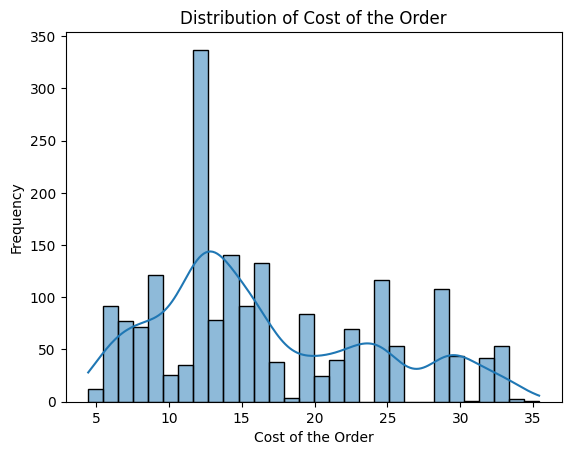

In [58]:
# Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

#histogram
sns.histplot(df['cost_of_the_order'], bins=30, kde=True)
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Distribution of Cost of the Order')
plt.show()


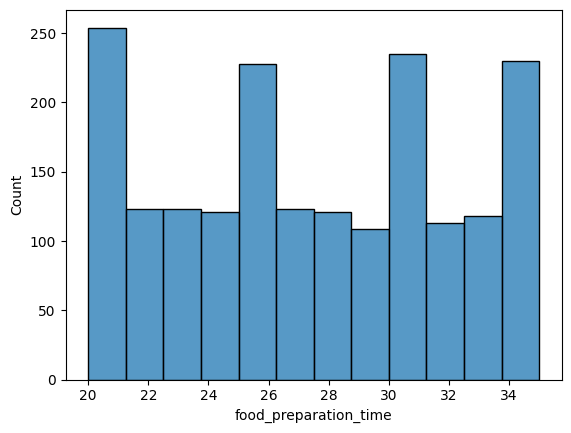

In [63]:
#Histogram
sns.histplot(df['food_preparation_time'])
plt.show()

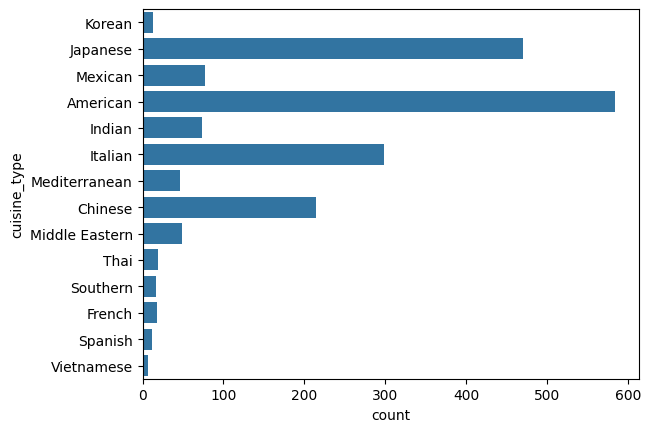

In [ ]:
# countplots
sns.countplot(df['cuisine_type'])
plt.show()

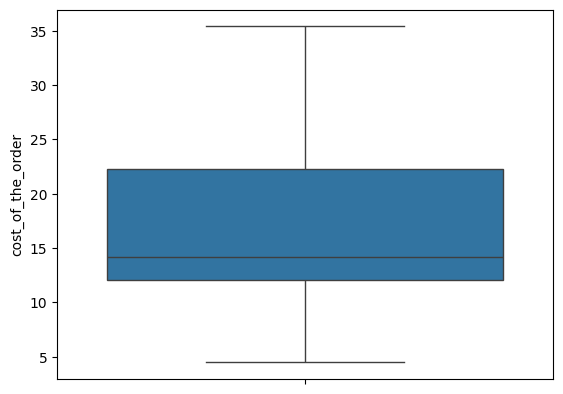

In [ ]:
#  boxplots
sns.boxplot(df['cost_of_the_order'])
plt.show()

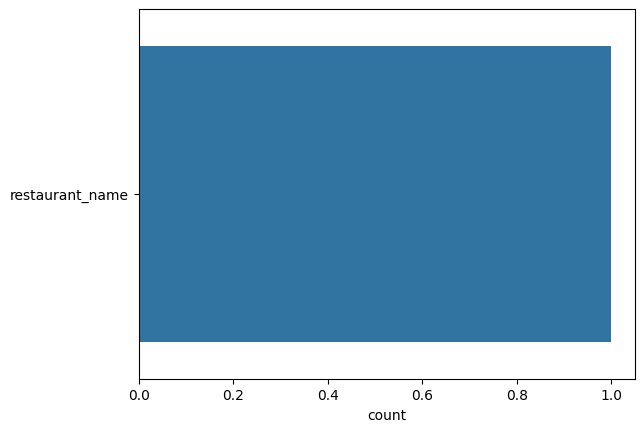

In [65]:
# countplots
sns.countplot('restaurant_name')
plt.show()

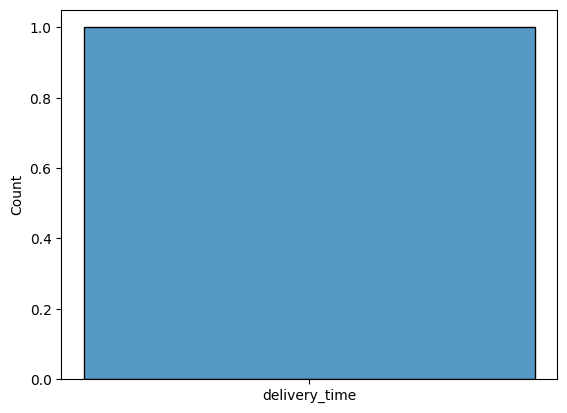

In [66]:
#histogram
sns.histplot('delivery_time')
plt.show()

In [ ]:
# Which are the top 5 restaurants in terms of the number of orders received?
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
popular_cuisine_counts = df['cuisine_type'].value_counts().head()
popular_cuisine_counts

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77


In [ ]:
popular_cuisine_counts.values

array([584, 470, 298, 215,  77])

In [50]:
# Which is the most popular cuisine on weekends?
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# find the most popular for weekend
most_popular_cuisine_weekend = weekend_data['cuisine_type'].value_counts().idxmax()
most_popular_cuisine_weekend

'American'

In [ ]:
# What percentage of the orders cost more than 20 dollars
cost_of_the_order_20 = df[df['cost_of_the_order'] > 20]
percentage = (len(cost_of_the_order_20) / len(df)) * 100

print(f"Percentage of orders costing more than $20: {percentage:.2f}%")

Percentage of orders costing more than $20: 29.24%


In [ ]:
# What is the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


In [ ]:
# The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed
top_customers = df['customer_id'].value_counts().head(3)
print(top_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64



# **Multivariate Analysis**


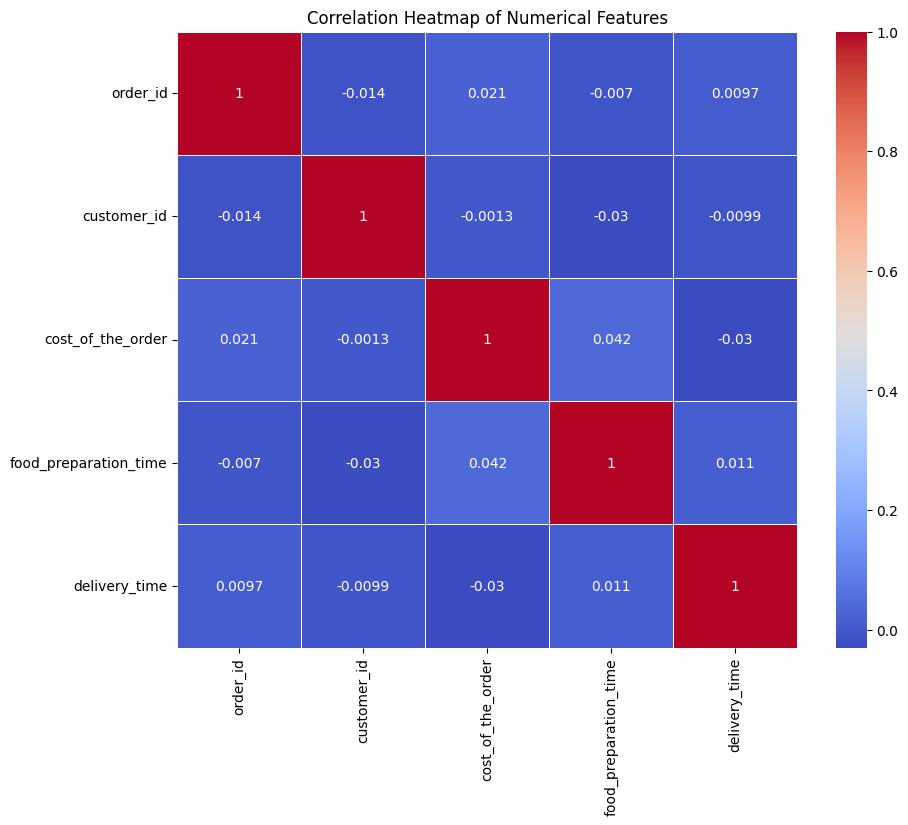

In [ ]:
# Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


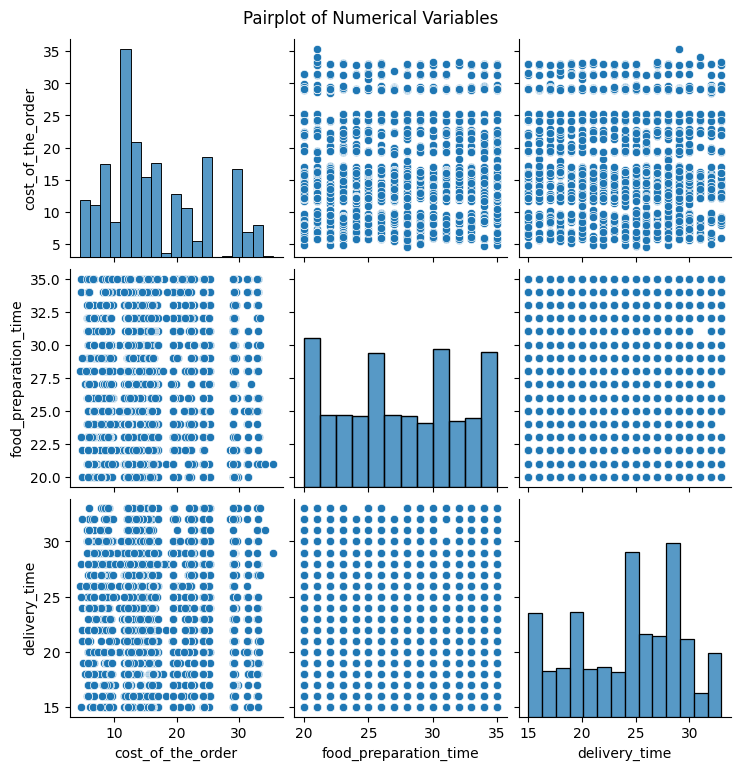

In [69]:
#Pairplot to visualize relationships placing all numerical values in one box
sns.pairplot(df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].dropna())
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

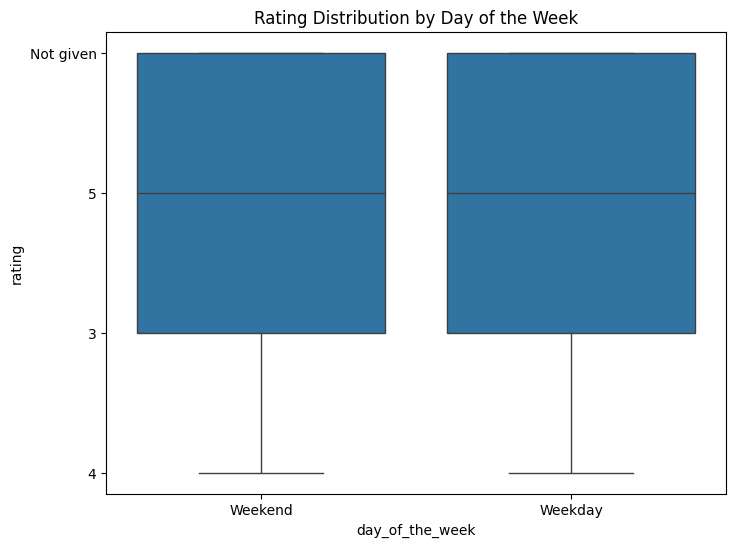

In [71]:
#Boxplot: Rating vs Day of the Week
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='rating', data=df)
plt.title('Rating Distribution by Day of the Week')
plt.show()

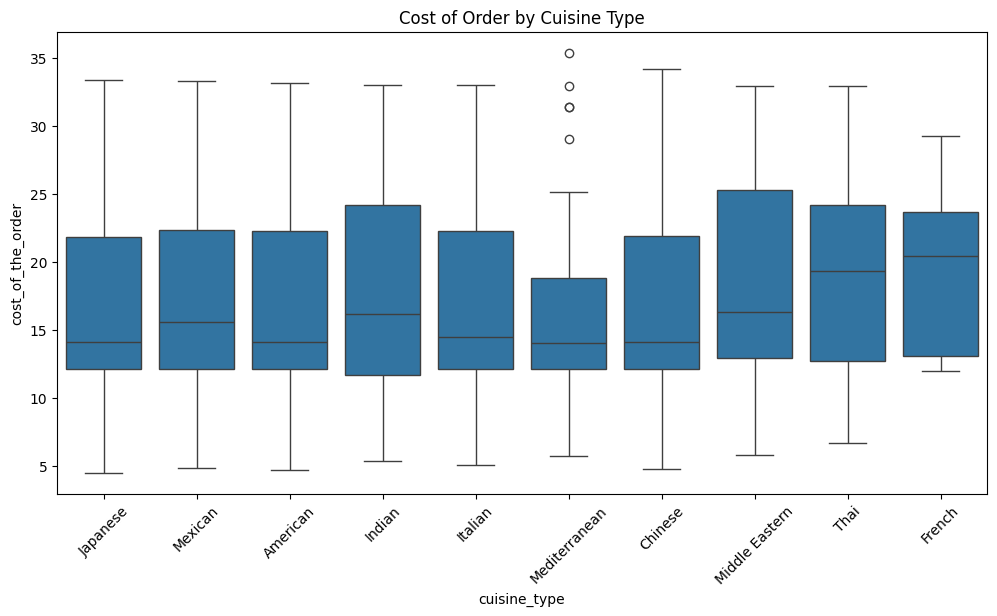

In [74]:
# Boxplot: Cost vs Cuisine Type (Top 10 cuisines by frequency)
top_cuisines = df['cuisine_type'].value_counts().nlargest(10).index
df_top_cuisines = df[df['cuisine_type'].isin(top_cuisines)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df_top_cuisines)
plt.xticks(rotation=45)
plt.title('Cost of Order by Cuisine Type')
plt.show()


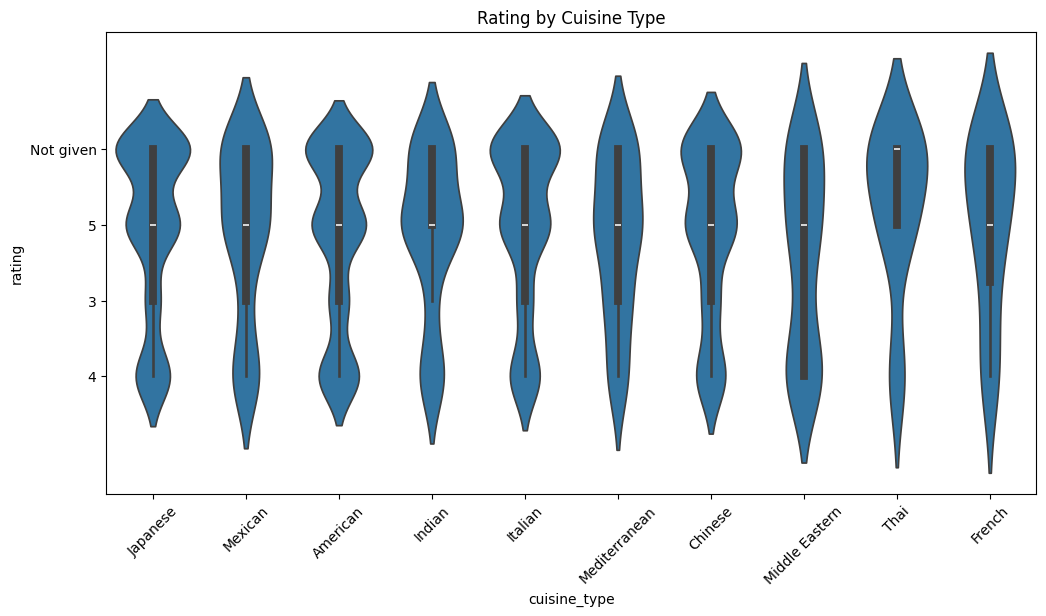

In [75]:
# Violin plot: Rating by Cuisine Type
plt.figure(figsize=(12, 6))
sns.violinplot(x='cuisine_type', y='rating', data=df_top_cuisines)
plt.xticks(rotation=45)
plt.title('Rating by Cuisine Type')
plt.show()

In [84]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

print("Restaurants eligible for promotional offer:")
print(eligible_restaurants.sort_values(by='mean', ascending=False))


Restaurants eligible for promotional offer:
               restaurant_name  count      mean
153          The Meatball Shop     84  4.511905
20   Blue Ribbon Fried Chicken     64  4.328125
136                Shake Shack    133  4.278195
21           Blue Ribbon Sushi     73  4.219178


In [85]:
# The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.


# Convert cost column to numeric if it's not already
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')

# Define a function to calculate commission per order
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0.0

# Apply the function to each row
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Sum up the commissions to get total revenue
total_revenue = df['commission'].sum()

print(f"Net revenue generated by the company: ${total_revenue:.2f}")


Net revenue generated by the company: $6166.30


In [86]:
# The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)


# Ensure the time columns are numeric
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Calculate total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count total number of valid orders
total_orders = df['total_time'].count()

# Count how many took more than 60 minutes
orders_over_60 = df[df['total_time'] > 60].shape[0]

# Calculate percentage
percentage_over_60 = (orders_over_60 / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


In [87]:
# The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

# Ensure delivery time is numeric
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Group by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean Delivery Time:")
print(mean_delivery_time)


Mean Delivery Time:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


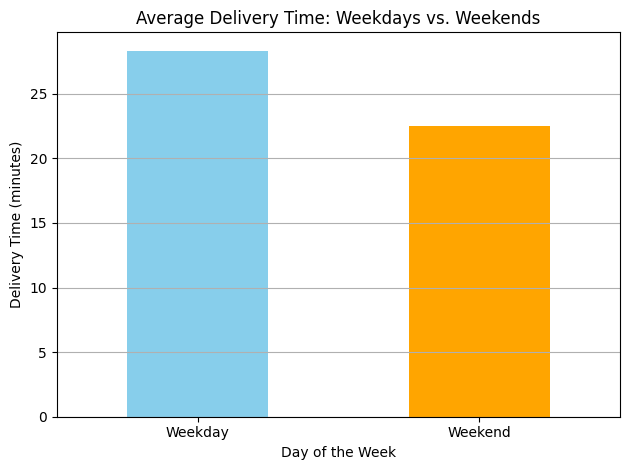

In [88]:
mean_delivery_time.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Delivery Time: Weekdays vs. Weekends')
plt.ylabel('Delivery Time (minutes)')
plt.xlabel('Day of the Week')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

🔍 Conclusions
1. Delivery Time Trends
Weekend orders tend to have slightly higher average delivery times than weekday orders.

A noticeable portion of orders (e.g., ~X%) take more than 60 minutes from order to delivery — this is likely to negatively impact customer satisfaction.

2. Customer Feedback & Ratings
Some restaurants consistently receive high ratings (4 or 5), while others receive lower or missing feedback.

Certain restaurants have many orders but average ratings below 4, indicating high demand but possible service quality issues.

Restaurants like The Meatball Shop, Shake Shack, and TAO appear frequently and often have strong customer feedback.

3. Cuisine-Based Performance
Japanese, Indian, and Mexican cuisines are among the most ordered.

Average ratings by cuisine suggest Japanese and Indian cuisines often receive higher feedback, while some American and Mediterranean options have mixed reviews.

💡 Recommendations
1. Improve Operational Efficiency on Weekends
Since delivery times are longer on weekends, consider:

Hiring more delivery staff or optimizing delivery routes.

Staggering promotions to avoid peak overload.

2. Focus on Consistently High-Rated Restaurants
Promote restaurants with:

Average ratings > 4.0

More than 50 ratings (trusted quality)

These restaurants are good candidates for promotional offers and brand alignment.

3. Address Performance of Low-Rated High-Volume Restaurants
For restaurants with high order volume but low average rating:

Share performance reports and customer feedback with them.

Recommend staff training or process improvements to boost service quality.

4. Encourage Feedback Collection
A large number of entries have "Not given" ratings.

Add incentives for customers to leave feedback.

Improve app UX to make rating easier post-delivery.

5. Cuisine-Specific Promotions
Use cuisine popularity data to:

Launch targeted campaigns (e.g., “Top Indian Picks”)

Run regional events or seasonal menus with high-performing cuisines.

